# Elipsoides sobre el ajuste de mezcla de gaussianas 

- Graficamos las elipsoides de confianza calculadas por *Expectation Maximization* (`GaussianMixture` class) ajustadas a datos simulados con una mezcla de un par de Gaussianas.

- El modelo *Expectation Maximization* va a usar necesariamente **k** componentes prefijadas.

- Aquí podemos ver que el modelo *Expectation Maximization* depende del número correcto de gaussianas en la mezcla. Si le decimos que `k = 2`, encuentra las Gaussianas.

- Si le decimos que `k = 3` o `k = 5`, el ajuste parte los datos en los clusters necesarios para ajustarse a ese dato.

-  Para calcular esta figura realizamos el siguiente código...

    - Cargamos el modulo *mixture* de *sklearn*.
    - Definimos los colores con los que vamos a marcar los datos aprendidos.

In [1]:
import itertools

import numpy as np
import matplotlib.pyplot as plt

from scipy import linalg
from sklearn import mixture
from matplotlib.patches import Ellipse

color_iter = itertools.cycle(
    ['limegreen', 'orchid', 'aqua', 'violet', 'magenta', 'deeppink', 'crimson', 'fuchsia', 'blue']
)

- La función va a armar un elipsoide de confianza usando los ejes de la matriz de covarianza estimada para la mezcla.

- Arma los paneles de la figura.

In [2]:
def plot_results(X, Y, means, covariances, index, title):
    splot = plt.subplot(3, 1, 1 + index)

    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # As the DP will not use every component it has access to unless
        # it needs it, we shouldn't plot the redundant components.
        if not np.any(Y == i):
            continue
        plt.scatter(X[Y == i, 0], X[Y == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi # Convert to degrees
        ell = Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-9., 5.)
    plt.ylim(-3., 6.)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)

- Aquí simulamos 500 muestras de dos componentes normales mezcladas. 

In [3]:
# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C), .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

- Se calculan los parámetros de la mezcla y se plotean de acuerdo a la predicción de etiqueta que hace el mismo método.

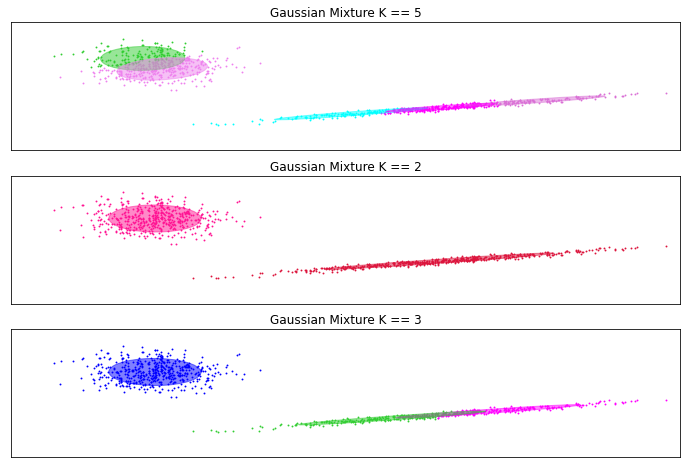

In [4]:
plt.figure(figsize=(12, 8))

# Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components=5, covariance_type='full').fit(X)
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0, 'Gaussian Mixture K == 5')

# Fit a Gaussian mixture with EM using two components
gmm = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(X)
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 1, 'Gaussian Mixture K == 2')

# Fit a Gaussian mixture with EM using three components
gmm = mixture.GaussianMixture(n_components=3, covariance_type='full').fit(X)
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 2, 'Gaussian Mixture K == 3')

plt.show()